###Connect to google drive and load the data

In [1]:
#Connect to google drive and load the data
from google.colab import drive
drive.mount('/content/gdrive')  

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


###Install required libraries

In [2]:
!pip install pandas-profiling==2.7.1 

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

###Load the ANZ synthesised transaction dataset

In [4]:
df_transactions = pd.read_excel (r'/content/gdrive/My Drive/ANZ/ANZ synthesised transaction dataset.xlsx',)
print (df_transactions)

           status  card_present_flag  ... merchant_long_lat movement
0      authorized                1.0  ...     153.38 -27.99    debit
1      authorized                0.0  ...     151.21 -33.87    debit
2      authorized                1.0  ...     151.21 -33.87    debit
3      authorized                1.0  ...     153.05 -26.68    debit
4      authorized                1.0  ...     153.44 -28.06    debit
...           ...                ...  ...               ...      ...
12038  authorized                0.0  ...     145.23 -37.81    debit
12039  authorized                1.0  ...     150.88 -33.96    debit
12040  authorized                1.0  ...     150.92 -33.74    debit
12041  authorized                1.0  ...     145.09 -37.91    debit
12042  authorized                1.0  ...     151.19 -33.93    debit

[12043 rows x 23 columns]


In [5]:
df_transactions.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [6]:
df_transactions=df_transactions[["customer_id","age","txn_description","balance","amount"]]

In [7]:
df_trans1= df_transactions.groupby(["customer_id"]).mean().reset_index()
df_trans1.head()

,customer_id,age,balance,amount
0,CUS-1005756958,53,2275.852055,222.862603
1,CUS-1117979751,21,9829.929000,339.843700
2,CUS-1140341822,28,5699.212250,212.632500
3,CUS-1147642491,34,9032.841186,245.600169
4,CUS-1196156254,34,22272.433755,147.145796


In [8]:
df_salary=df_transactions[df_transactions["txn_description"]=="PAY/SALARY"].groupby("customer_id").mean().reset_index()
df_salary=df_salary[["customer_id","amount"]]
df_salary=df_salary.rename(columns = {'amount':'salary'})

In [9]:
df_salary['Annual_Salary'] = df_salary['salary']*12
df_salary.head()

,customer_id,salary,Annual_Salary
0,CUS-1005756958,970.47,11645.64
1,CUS-1117979751,3578.65,42943.80
2,CUS-1140341822,1916.51,22998.12
3,CUS-1147642491,1711.39,20536.68
4,CUS-1196156254,3903.73,46844.76


In [10]:
df_data=pd.merge(df_trans1, df_salary, on="customer_id")
df_data.head()

,customer_id,age,balance,amount,salary,Annual_Salary
0,CUS-1005756958,53,2275.852055,222.862603,970.47,11645.64
1,CUS-1117979751,21,9829.929000,339.843700,3578.65,42943.80
2,CUS-1140341822,28,5699.212250,212.632500,1916.51,22998.12
3,CUS-1147642491,34,9032.841186,245.600169,1711.39,20536.68
4,CUS-1196156254,34,22272.433755,147.145796,3903.73,46844.76


In [11]:
profile_trans = ProfileReport(df_data)
profile_trans

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


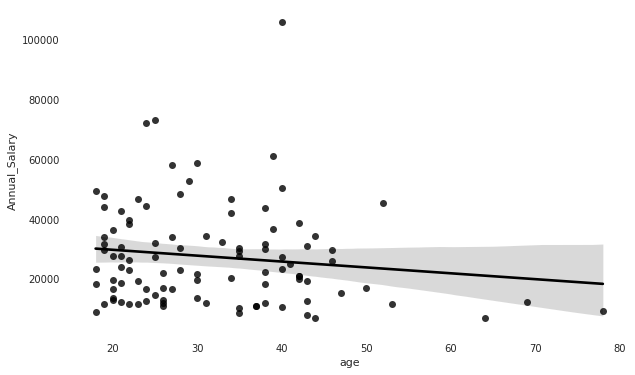

In [12]:
plt.figure(figsize=(10, 6))
sns.regplot("age", "Annual_Salary", data=df_data, color = "black")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


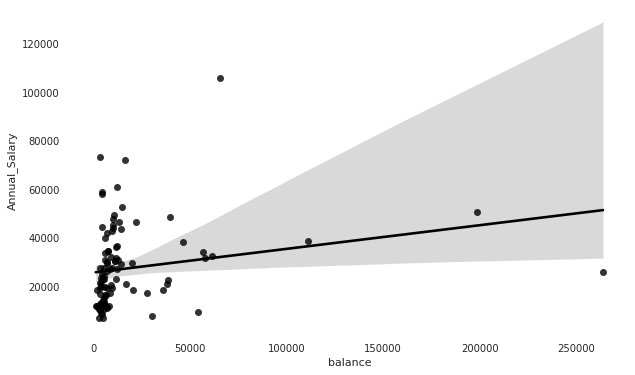

In [13]:
plt.figure(figsize=(10, 6))
sns.regplot("balance", "Annual_Salary", data=df_data, color = "black")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


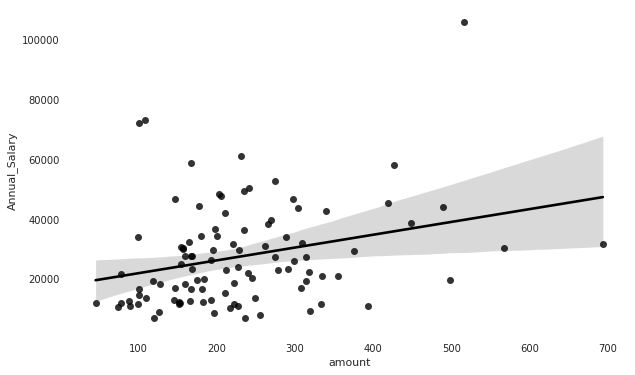

In [14]:
plt.figure(figsize=(10, 6))
sns.regplot("amount", "Annual_Salary", data=df_data, color = "black")

###Linear Regression Model

In [15]:
X=df_data[["age","amount","balance"]].values
y=df_data["Annual_Salary"].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(X_train, y_train)
lr.score(X, y)

0.13940039208390942

In [19]:
y_pred=lr.predict(X_test)
print(y_pred)

[18066.0039313  28048.87788434 33964.40370571 26812.07831073
 23275.41553816 19194.23966538 25466.94714883 19165.22336695
 27656.53662088 17012.13629899 14458.50107427 21357.20721965
 30843.6006899  31220.93976927 22566.95215358 21746.47152032
 31091.59600445 33836.28189411 21459.1688087  28262.59053653
 16253.09351596 22698.39189007 21605.29771251 18152.35910978
 24490.88869548]


In [20]:
rmse = mean_squared_error(y_test, y_pred)
print("root mean square error", rmse)

root mean square error 343979081.7902546


In [21]:
print('Coefficient of determination: ', r2_score(y_test, y_pred))
print("The model predicts annual salary will be=", lr.predict([[30,5000,400]])[0])


Coefficient of determination:  -0.056618508595652095
The model predicts annual salary will be= 260089.83259844696


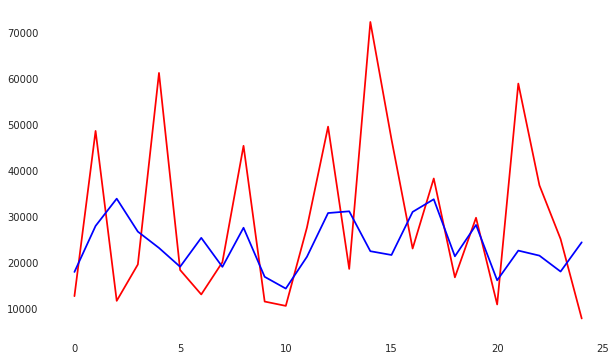

In [22]:
plt.figure(figsize=(10,6))
plt.plot(y_test, color='r')
plt.plot(y_pred, color='b')

plt.show()

###Decision Tree Regressor

In [23]:
from sklearn import tree

tree_regression_model = tree.DecisionTreeRegressor()

In [24]:
tree_regression_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [25]:
# Predict
y_pred_tree = tree_regression_model.predict(X_test)
print(y_pred_tree)

[15269.64 31677.12 19517.76 23427.48 32622.12 32622.12 16754.76  7155.96
 17243.76  7155.96 12025.56 30000.   34256.88 31677.12 31677.12 32622.12
 58363.44 36323.4  73286.76 23427.48 12025.56 44550.72 32622.12  7155.96
 31056.12]


In [26]:
# model evaluation
rmse = mean_squared_error(y_test, y_pred_tree)
r2 = r2_score(y_test, y_pred_tree)

In [27]:
# printing values
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Root mean squared error:  407803915.19116807
R2 score:  -0.25267258237377965


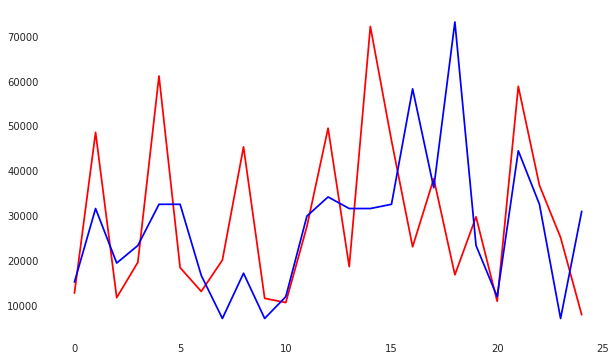

In [28]:
plt.figure(figsize=(10,6))
plt.plot(y_test, color='r')
plt.plot(y_pred_tree, color='b')

plt.show()

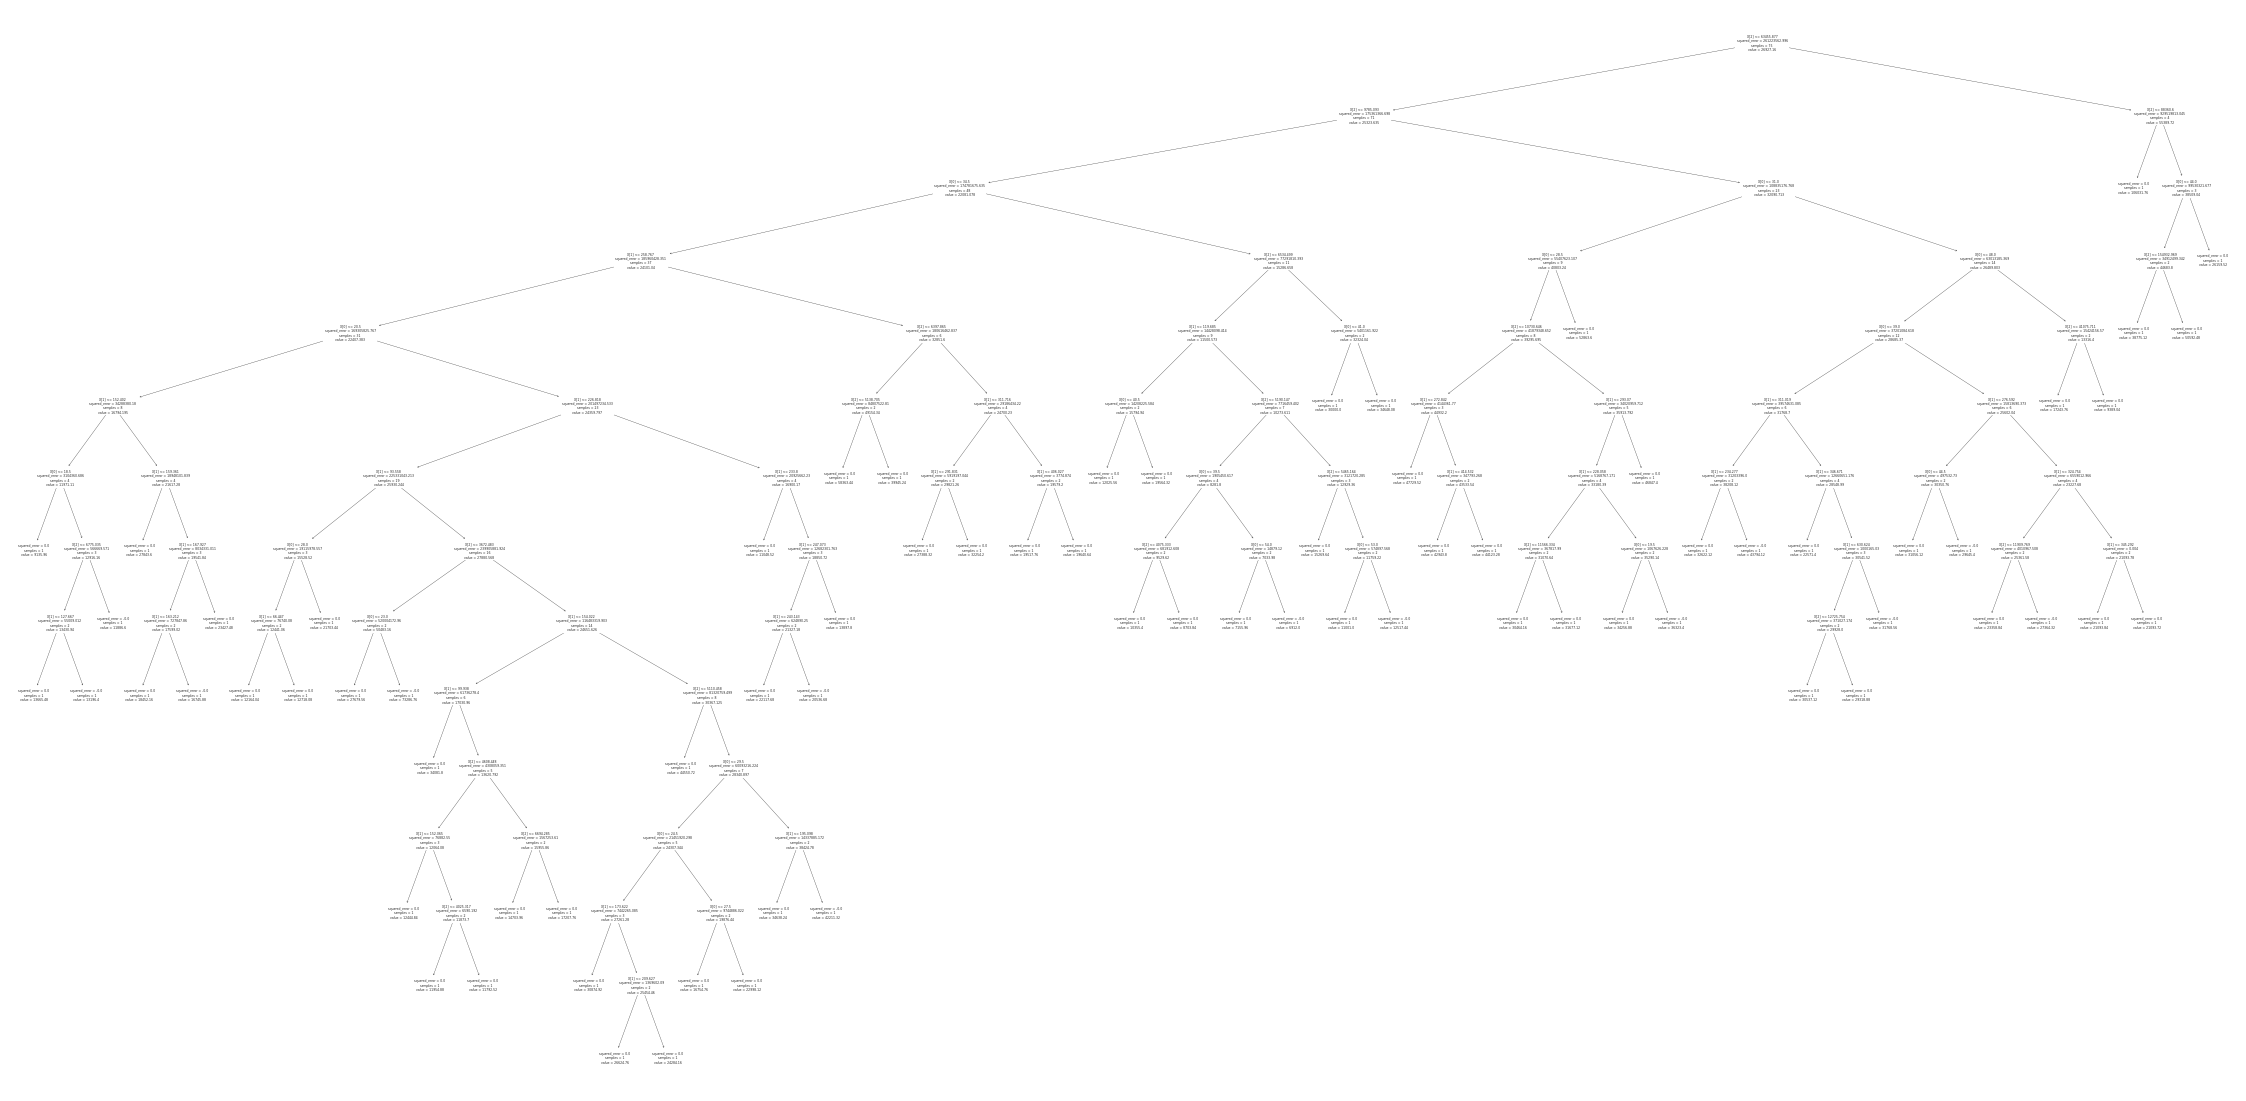

In [29]:
plt.figure(figsize=(40,20))
tree.plot_tree(tree_regression_model);